In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [18]:
img = cv2.imread('image.jpg')


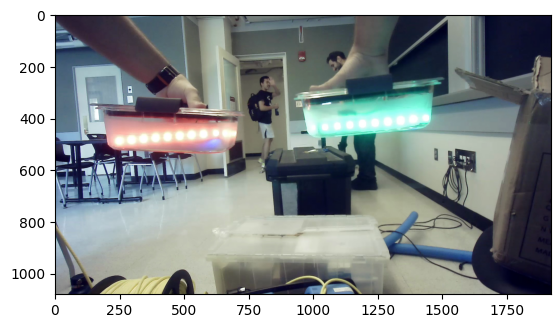

In [19]:
plt.imshow(img)


In [4]:
cap = cv2.VideoCapture('video.mp4')


[ WARN:0] global ../modules/videoio/src/cap_gstreamer.cpp (734) open OpenCV | GStreamer warning: Error opening bin: unexpected reference "video" - ignoring
[ WARN:0] global ../modules/videoio/src/cap_gstreamer.cpp (501) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


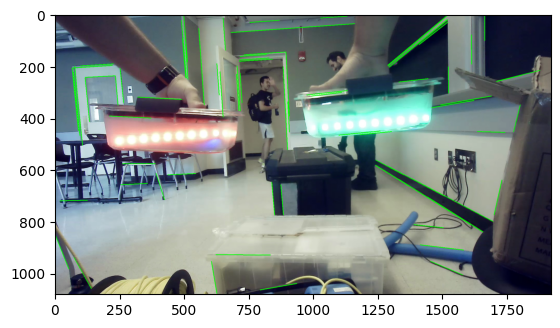

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=10,
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img)


In [10]:

from dt_apriltags import Detector


In [8]:
from dt_apriltags import Detector

ModuleNotFoundError: No module named 'dt_apriltags'

In [3]:
new_img=cv2.imread("Swimming_pool_with_lane_ropes_in_place-1157366016.jpeg")

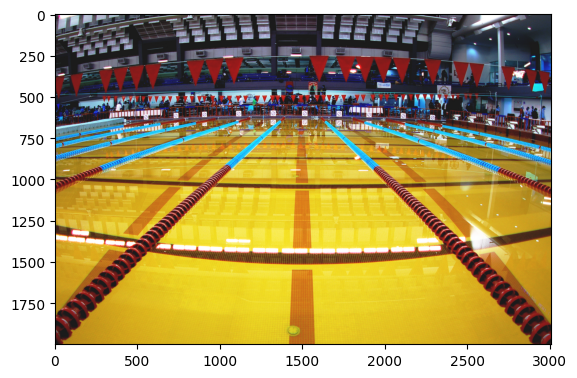

In [4]:
plt.imshow(new_img)

In [23]:
bridge_img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)


In [24]:
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)


In [25]:
tags = at_detector.detect(bridge_img, estimate_tag_pose=False, camera_params=None, tag_size=None)


In [26]:
color_img = cv2.cvtColor(bridge_img, cv2.COLOR_GRAY2RGB)


In [27]:
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))

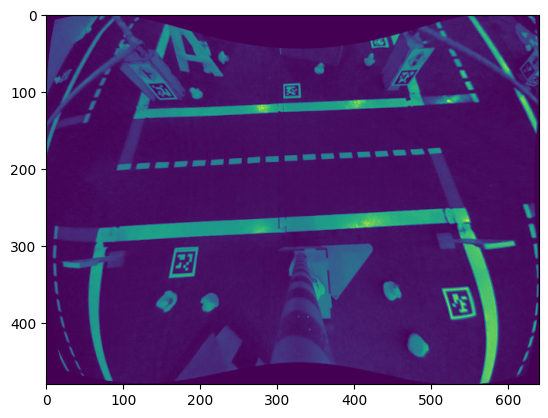

In [28]:
plt.imshow(bridge_img)
